In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
dataframe=pd.read_csv("/content/drive/MyDrive/content/Zomato-data-.csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


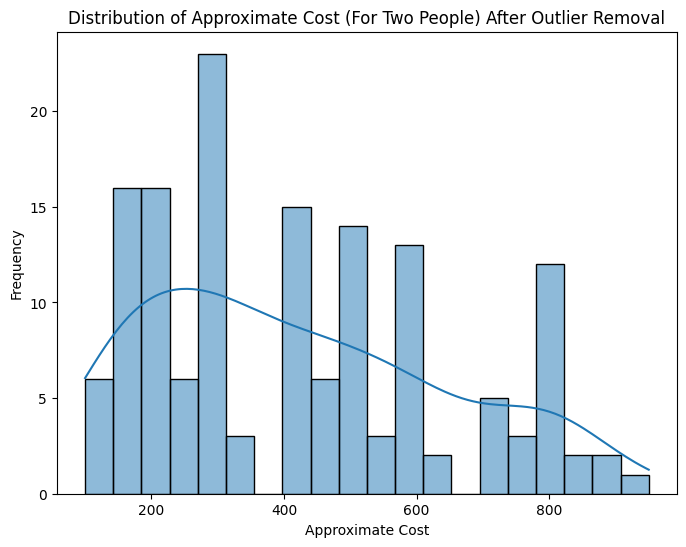

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    float64
 6   listed_in(type)              148 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ KB


In [17]:


# Handle missing values
dataframe.dropna(inplace=True)

# Convert 'rate' column to numeric
def handleRate(value):
    try:
        value = str(value).split('/')[0]
        return float(value)
    except:
        return np.nan

dataframe['rate'] = dataframe['rate'].apply(handleRate)

# Convert 'approx_cost(for two people)' to numeric
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str)
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Remove outliers using IQR method
Q1 = dataframe['approx_cost(for two people)'].quantile(0.25)
Q3 = dataframe['approx_cost(for two people)'].quantile(0.75)
IQR = Q3 - Q1

# Filter the data
dataframe = dataframe[(dataframe['approx_cost(for two people)'] >= (Q1 - 1.5 * IQR)) &
                      (dataframe['approx_cost(for two people)'] <= (Q3 + 1.5 * IQR))]

# Visualize distribution after handling outliers
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['approx_cost(for two people)'], bins=20, kde=True)
plt.title('Distribution of Approximate Cost (For Two People) After Outlier Removal')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.show()

# Check data info
dataframe.info()

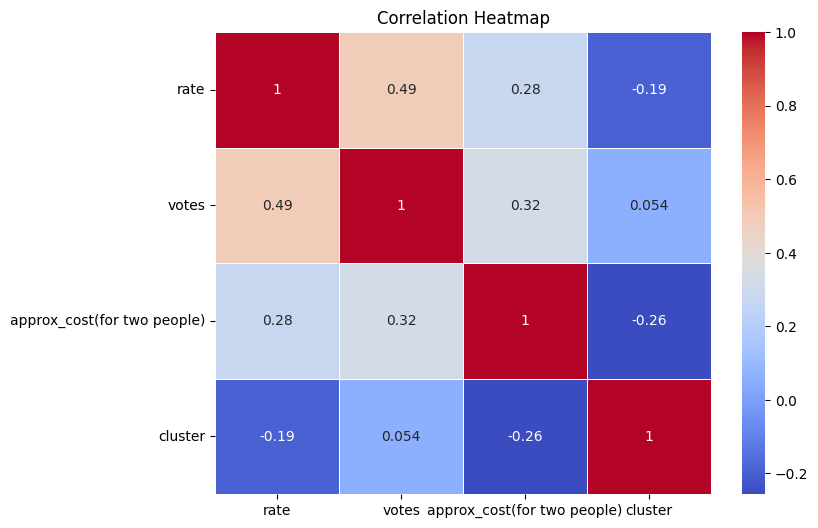

In [21]:
# Correlation Heatmap with only numeric columns
numeric_df = dataframe.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# def handleRate(value):
#     value=str(value).split('/')
#     value=value[0];
#     return float(value)

# dataframe['rate']=dataframe['rate'].apply(handleRate)
# print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Mean Squared Error: 0.1928870178531237
R-squared Score: 0.09565369833396908


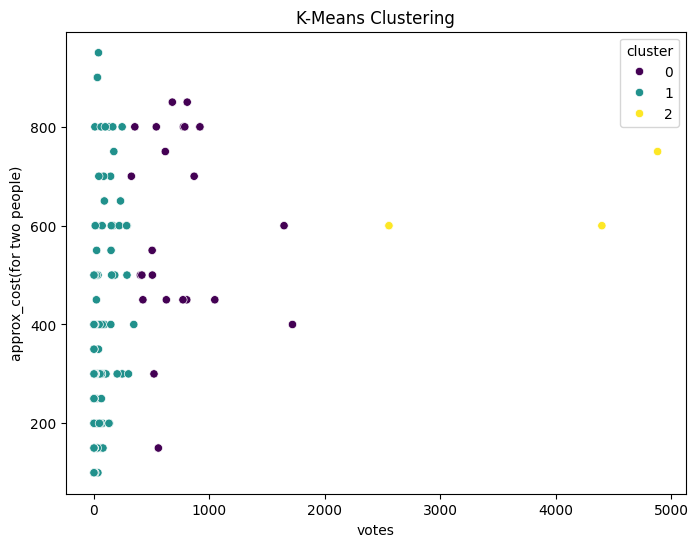

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    float64
 6   listed_in(type)              148 non-null    object 
 7   cluster                      148 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 8.8+ KB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
X = dataframe[['votes', 'approx_cost(for two people)']]
y = dataframe['rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(X)

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataframe['votes'], y=dataframe['approx_cost(for two people)'], hue=dataframe['cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Check data info
dataframe.info()

Text(0.5, 0, 'Type of restaurant')

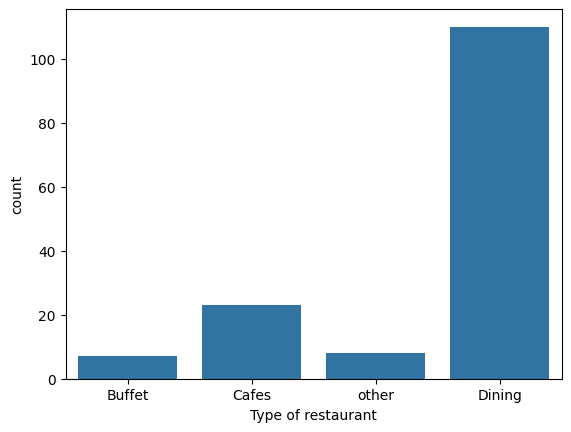

In [22]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


Text(0, 0.5, 'Votes')

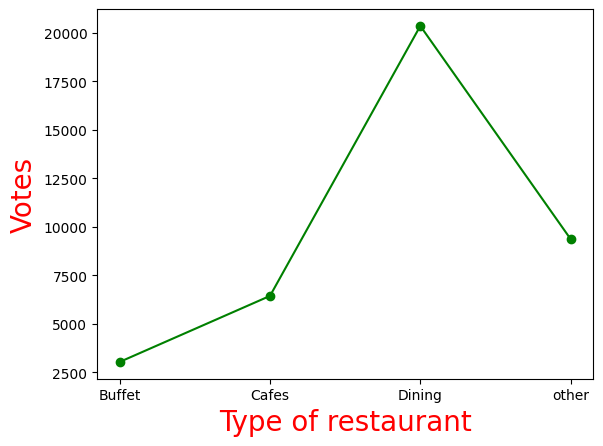

In [23]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)


In [24]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

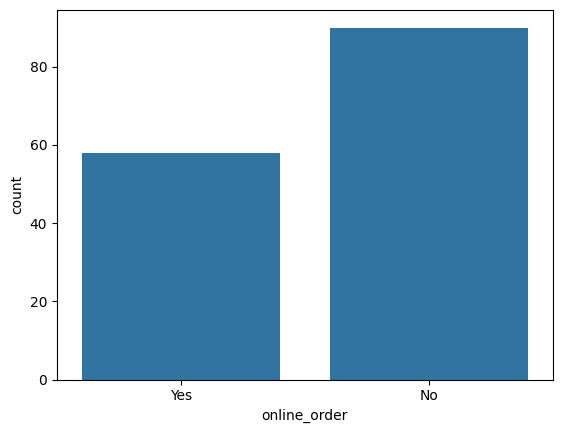

In [25]:
sns.countplot(x=dataframe['online_order'])


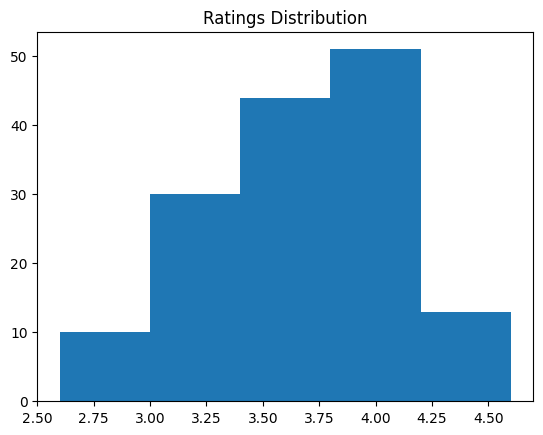

In [26]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

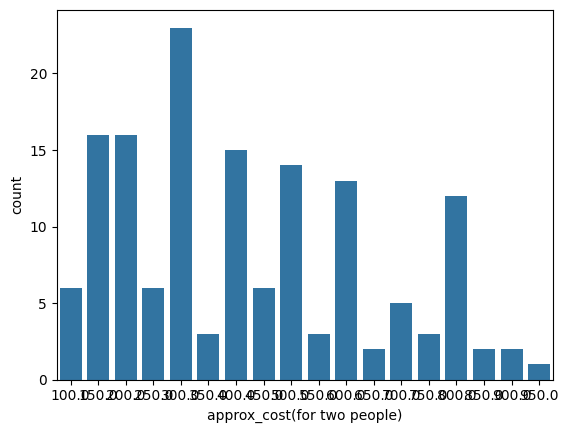

In [27]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

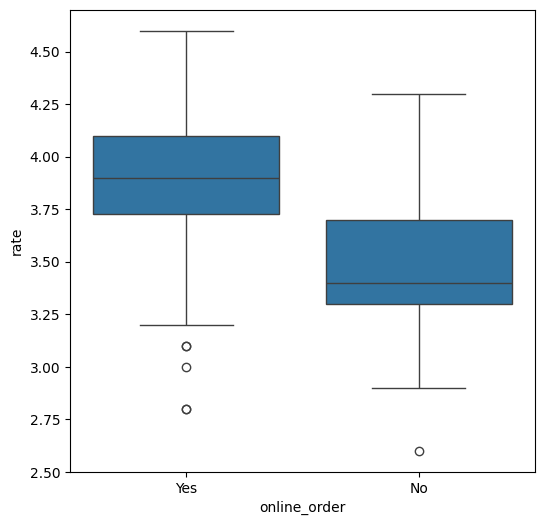

In [28]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


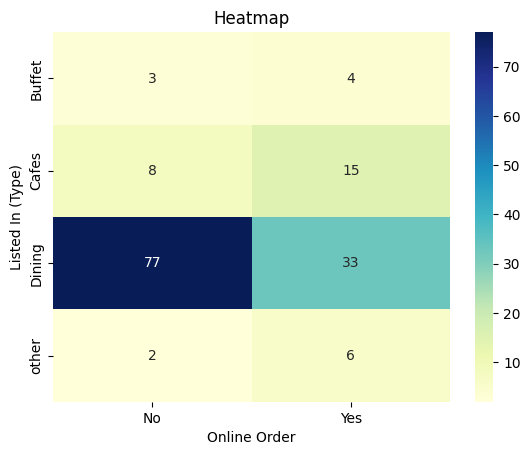

In [29]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()
